Jupyter Python3 Notebook for experiment nr. 213
================

This Notebook was created using the Jupyter Notebook. Be aware that you might want to switch to that.
it is assumend, that this notebook is in the same directory as the module for this experiment.

change the filenames and paths according to your set up

In [2]:
## using inline plots
%matplotlib inline

## importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from helper import printResult
import uncertainties as unc
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
from scipy.stats import chi2

2) Dämpfungskonstante $\lambda$ und Halbwertszeit $T_{1/2}$
===

In [3]:
# loading data
t, w = np.loadtxt('data/tab_daempfung.txt', skiprows=1, unpack=True)
t_err = 1  # in seconds
w_err = 10  # in min^-1

# fitting
def exp(x, lamb, a):
    """
    This function calculates an exponential function for a given lambda, a and x-data
    """
    return a*np.exp(lamb*x)

popt, pcov = curve_fit(exp, t, w, p0=[1, 900])  # calculating the optimal parameters
popt_err = np.sqrt(np.diag(pcov))  # errors of optimal parameters

printResult('\\lambda', popt[0], popt_err[0], "\\frac 1 {min}")
printResult('a',popt[1],popt_err[1],"\\frac 1 {min}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
par_str = r'$\lambda=(' + str(round(popt[0],5)) + '\pm' + str(round(popt_err[0],5)) + ')\ \mathrm{[1/min]}$' + '\n' + r'$A=(' + str(round(popt[1],5)) + '\pm' + str(round(popt_err[1],5)) + ')\ \mathrm{[1/min]}$'
printResult('t_{1/2}', -np.log(2)/popt[0], np.log(2)*popt_err[0]/popt[0]**2, "min")

<IPython.core.display.Math object>

In [5]:
# chi square, chi square reduced, goodness of fit
chisquare=np.sum((exp(t, *popt)-w)**2/(5*np.ones(np.shape(w)))**2)
dof=len(w)-2  #dof: degrees of freedom, Zahl der Messwerte abzueglich Zahl der Parameter
printResult("\chi^2", chisquare)
printResult("\chi^2_{red}",chisquare/dof)

goodness = 100-chi2.cdf(chisquare,dof)*100
printResult("Fitwahrscheinlichkeit\ R", goodness,0,unit="\%")
stat_str = r'$\chi^2=$' + str(chisquare) + '\n' + r'$\chi^2_{red}=$' + str(chisquare/dof) + '\n' + r'$Fitwahrscheinlichkeit:\ $' + str(round(goodness,5)) +'%\n'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

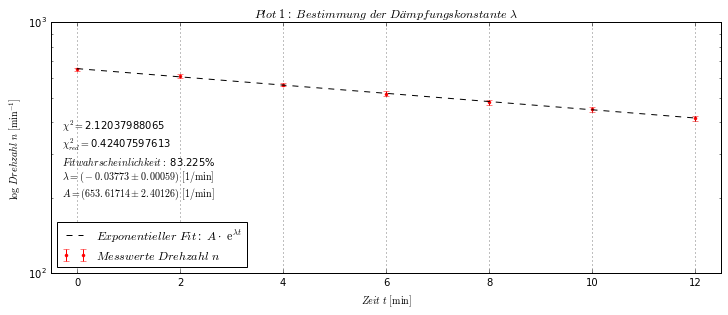

In [6]:
# Plotting Section
fig = plt.figure(figsize=(12,4.5))
ax = fig.add_subplot(111)
ax.errorbar(t, w, yerr=w_err, fmt='r.', label='$Messwerte\ Drehzahl\ n$')
ax.plot(t, exp(t, *popt), 'k--', label='$Exponentieller\ Fit:\ A \\cdot\ \\mathrm{e}^{\\lambda t}$')
ax.text(-.3, 200, stat_str+par_str)
ax.set_yscale('log')
ax.set_xlim(np.min(t)-0.5, np.max(t)+0.5)
ax.set_title('$Plot\ 1:\ Bestimmung\ der\ Dämpfungskonstante\ \lambda$')
ax.set_xlabel('$Zeit\ t\ \mathrm{[min]}$')
ax.set_ylabel('$\mathrm{log}\ Drehzahl\ n\ \mathrm{[min^{-1}]}$')
ax.legend(loc=3)
ax.grid()
plt.savefig('plot1.pdf', dpi=400, format='pdf')
plt.show()

3b) Mittlere Drehfrequenz $\bar{\omega}_F$, Trägheitsmoment $I_z$
===

In [7]:
# loading data; f_1_15 means one mass at 15cm, f_2_20 means 2 masses at 20cm, t is in seconds, f in min^-1
f_1_15, t_1_15, f_1_20, t_1_20, f_2_15, t_2_15, f_2_20, t_2_20 = np.loadtxt('data/tab_praezession.txt', skiprows=2, 
                                                                           unpack=True)
t_err = 2  # in seconds
f_err = 10  # in min^-1

# converting the time values to minutes
t_1_15 = t_1_15/60
t_1_20 = t_1_20/60
t_2_15 = t_2_15/60
t_2_20 = t_2_20/60

# calculating the f at the end of the precession
lamb = unc.ufloat(popt[0], popt_err[0])  # assigning the needed variable from 2)

w_f_1_15 = unp.uarray(f_1_15, 5)*(1+unp.exp(lamb*unp.uarray(t_1_15,1)/60))/2
w_f_1_20 = unp.uarray(f_1_20, 5)*(1+unp.exp(lamb*unp.uarray(t_1_20,1)/60))/2
w_f_2_15 = unp.uarray(f_2_15, 5)*(1+unp.exp(lamb*unp.uarray(t_2_15,1)/60))/2
w_f_2_20 = unp.uarray(f_2_20, 5)*(1+unp.exp(lamb*unp.uarray(t_2_20,1)/60))/2

# fitting section
def lin_reg(x,k):
    return x*k

# finding optimal parameters for each dataset
popt1, pcov1 = curve_fit(lin_reg, unp.nominal_values(w_f_1_15), t_1_15)
printResult("s_{f,1,15}", popt1[0], np.sqrt(np.diag(pcov1))[0],"min^{-1}",7)

popt2, pcov2 = curve_fit(lin_reg, unp.nominal_values(w_f_1_20), t_1_20)
printResult('s_{f,1,20}', popt2[0], np.sqrt(np.diag(pcov2))[0],"min^{-1}",7)

popt3, pcov3 = curve_fit(lin_reg, unp.nominal_values(w_f_2_15), t_2_15)
printResult('s_{f,2,15}', popt3[0], np.sqrt(np.diag(pcov3))[0],"min^{-1}",7)

popt4, pcov4 = curve_fit(lin_reg, unp.nominal_values(w_f_2_20), t_2_20)
printResult('s_{f,2,20}', popt4[0], np.sqrt(np.diag(pcov4))[0],"min^{-1}",7)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

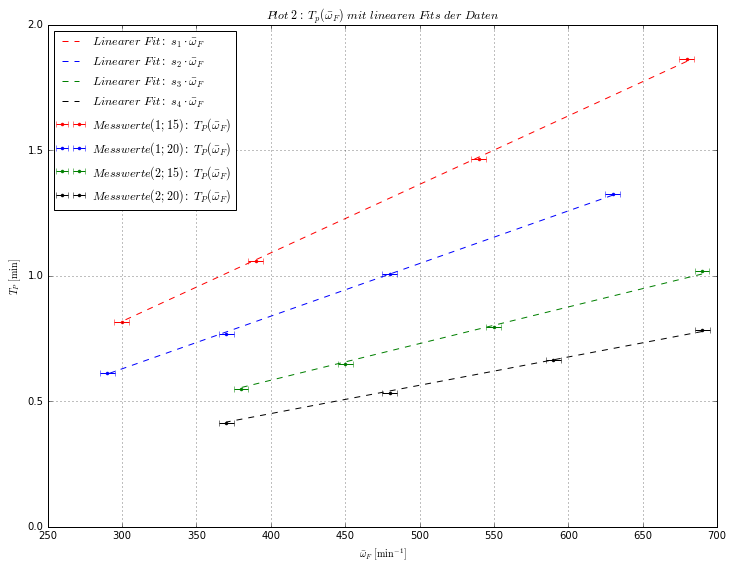

In [8]:
# Plotting Section
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
# data
ax.errorbar(unp.nominal_values(w_f_1_15), t_1_15, xerr=unp.std_devs(w_f_1_15), fmt='r.', label='$Messwerte(1;15):\ T_P(\\bar{\omega}_F)$')
ax.errorbar(unp.nominal_values(w_f_1_20), t_1_20, xerr=unp.std_devs(w_f_1_20), fmt='b.', label='$Messwerte(1;20):\ T_P(\\bar{\omega}_F)$')
ax.errorbar(unp.nominal_values(w_f_2_15), t_2_15, xerr=unp.std_devs(w_f_2_15), fmt='g.', label='$Messwerte(2;15):\ T_P(\\bar{\omega}_F)$')
ax.errorbar(unp.nominal_values(w_f_2_20), t_2_20, xerr=unp.std_devs(w_f_2_20), fmt='k.', label='$Messwerte(2;20):\ T_P(\\bar{\omega}_F)$')
# fits
ax.plot(unp.nominal_values(w_f_1_15), lin_reg(unp.nominal_values(w_f_1_15), *popt1), 'r--', label='$Linearer\ Fit:\ s_1 \cdot \\bar{\omega}_F$')
ax.plot(unp.nominal_values(w_f_1_20), lin_reg(unp.nominal_values(w_f_1_20), *popt2), 'b--', label='$Linearer\ Fit:\ s_2 \cdot \\bar{\omega}_F$')
ax.plot(unp.nominal_values(w_f_2_15), lin_reg(unp.nominal_values(w_f_2_15), *popt3), 'g--', label='$Linearer\ Fit:\ s_3 \cdot \\bar{\omega}_F$')
ax.plot(unp.nominal_values(w_f_2_20), lin_reg(unp.nominal_values(w_f_2_20), *popt4), 'k--', label='$Linearer\ Fit:\ s_4 \cdot \\bar{\omega}_F$')
#params
ax.set_title('$Plot\ 2:\ T_p(\\bar{\omega}_F)\ mit\ linearen\ Fits\ der\ Daten$')
ax.set_xlabel('$\\bar{\omega}_F\ \mathrm{[min^{-1}]}$')
ax.set_ylabel('$T_P\ \mathrm{[min]}$')
ax.set_ylim(0, 2)
ax.legend(loc=2)
ax.grid()
plt.savefig('plot2.pdf', dpi=400, format='pdf')
plt.show()

- Trägheitsmoment:

In [9]:
# s = [s1, s2, s3, s4]
s = unp.uarray([popt1[0], popt2[0], popt3[0], popt4[0]], 0.02e-3) * 3600  # in seconds^2
m = 9.85e-3 * np.array([1,1,2,2])  # 1 mass at 15/20 cm, 2 masses at 15/20 cm
l = np.array([0.15, 0.2, 0.15, 0.2])  # lenghts

Iz = np.mean(m*9.81*l*s/(2*np.pi))
printResult('I_z',Iz,unit="kg\cdot m^2")

<IPython.core.display.Math object>

4b) Umlauffrequenz vs. $\omega_F$
===

In [10]:
# loading data
wf, t = np.loadtxt('data/tab_umlaufzeiten.txt', skiprows=1, unpack=True)
t = t/10  # Umlaufzeit eines Umlaufes (für 10 Umläufe wurde gemessen)
wf = wf/60  # wf in sec
wf_err = 10/60
t_err = 0.2/10  # Fehler auf Zeit in s pro Umlauf

# fit
def lin_reg2(x, k, d):
    return k*x+d

popt, pcov = curve_fit(lin_reg2, wf, 2*np.pi/t)
popt_err = np.sqrt(np.diag(pcov))
printResult('k', popt[0], popt_err[0])
printResult("d",popt[1],popt_err[1],"s^{-1}")
k = unc.ufloat(popt[0], popt_err[0])
par_str = r'$k=' + str(round(popt[0],4)) + "\pm" + str(round(popt_err[0],4)) + '$\n' + r'$d=' + str(round(popt[1],4)) + "\pm" + str(round(popt_err[1],4)) + '\ \mathrm{s^{-1}}$'

delta_I = Iz/(1/k-1) # delta I
Ix = delta_I+Iz
printResult('\Delta I', delta_I, unit="kg\cdot m^2")
printResult('I_x',Ix, unit="kg\cdot m^2")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

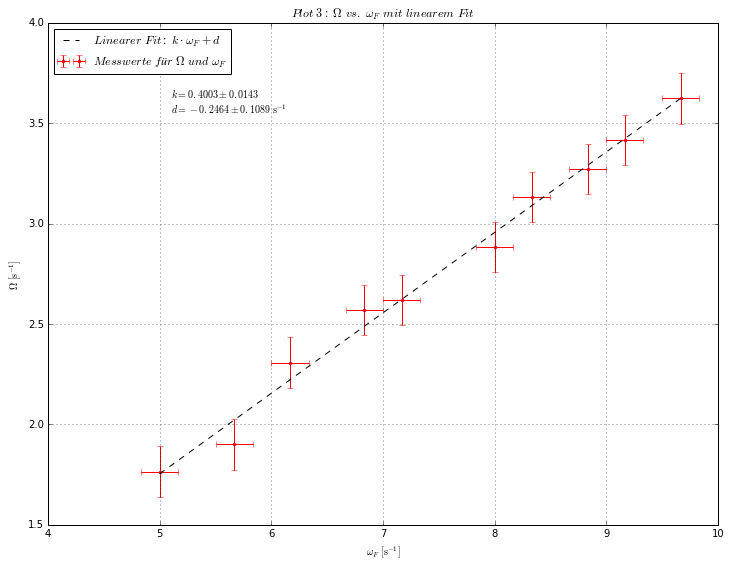

In [11]:
# Plotting Section
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.errorbar(wf, 2*np.pi/t, xerr=wf_err, yerr=t_err*2*np.pi, fmt='r.', label='$Messwerte\ für\ \Omega\ und\ \omega_F$')
ax.plot(wf, lin_reg2(wf, *popt), 'k--', label='$Linearer\ Fit:\ k\cdot \omega_F + d$')
ax.text(5.1, 3.55, par_str)
ax.set_title('$Plot\ 3:\ \Omega\ vs.\ \omega_F\ mit\ linearem\ Fit$')
ax.set_xlabel('$\omega_F\ \mathrm{[s^{-1}]}$')
ax.set_ylabel('$\Omega\ \mathrm{[s^{-1}]}$')
ax.legend(loc=2)
ax.grid()
plt.savefig('plot3.pdf', dpi=400, format='pdf')
plt.show()

5) $\omega_N$ vs. $\omega_F$
===

In [12]:
# loading data
w_F, w_N = np.loadtxt('data/tab_nutationsfrequenz.txt', skiprows=1, unpack=True)

# fit 
popt, pcov = curve_fit(lin_reg2, w_F, w_N)
popt_err = np.sqrt(np.diag(pcov))
printResult('k', popt[0], popt_err[0])
printResult('d',popt[1],popt_err[1],"min^{-1}")
par_str = r'$k=' + str(round(popt[0],4)) + "\pm" + str(round(popt_err[0],4)) + '$' + '\n' + r'$d=' + str(round(popt[1],4)) + "\pm" + str(round(popt_err[1],4)) + '\ \mathrm{[min^{-1}]}$'
k = unc.ufloat(popt[0], popt_err[0])

Ix = Iz/k  # Berechnung von Ix
printResult('I_x', Ix, unit="kg\cdot m^2")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

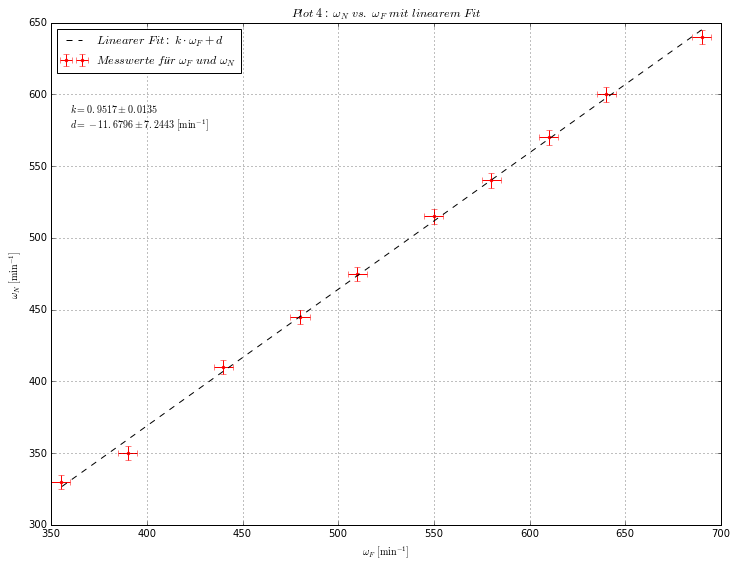

In [13]:
# plotting section
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.errorbar(w_F, w_N, yerr=5, xerr=5, fmt='r.', label='$Messwerte\ für\ \omega_F\ und\ \omega_N$')
ax.plot(w_F, lin_reg2(w_F, *popt), 'k--', label='$Linearer\ Fit:\ k\cdot \omega_F + d$')
ax.text(360, 575, par_str)
ax.set_title('$Plot\ 4:\ \omega_N\ vs.\ \omega_F\ mit\ linearem\ Fit$')
ax.set_xlabel('$\omega_F\ \mathrm{[min^{-1}]}$')
ax.set_ylabel('$\omega_N\ \mathrm{[min^{-1}]}$')
ax.legend(loc=0)
ax.grid()
plt.savefig('plot4.pdf', dpi=400, format='pdf')